### ======================================================
### 📊 WEATHER DATA VISUALIZATION & ANALYSIS
### ======================================================
### Dataset: Rainfall_Data_Germany_Complete.csv
### Tasks:
### 1️⃣ Visualize Temperature vs Time
### 2️⃣ Visualize Monthly Average Rainfall Trend (Rolling Average)
### 3️⃣ Add Error Bars for Temperature Uncertainty
### 4️⃣ Print Observations (Hottest, Coldest, Rainfall Trends)
### ======================================================

### Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')

df = pd.read_csv('climate-data.csv')

### Check dataset information

In [7]:
df.head()

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%)
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              1080 non-null   object 
 1   Latitude          1080 non-null   float64
 2   Longitude         1080 non-null   float64
 3   Month             1080 non-null   int64  
 4   Year              1080 non-null   int64  
 5   Rainfall (mm)     1080 non-null   float64
 6   Elevation (m)     1080 non-null   int64  
 7   Climate_Type      1080 non-null   object 
 8   Temperature (°C)  1080 non-null   float64
 9   Humidity (%)      1080 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 84.5+ KB


### Filtering Data for One City

In [11]:
city_name = "Berlin"
city_df = df[df["City"] == city_name].copy()

# Create a proper datetime column for time series
city_df["Date"] = pd.to_datetime(city_df["Year"].astype(str) + "-" + city_df["Month"].astype(str) + "-01")

# Sort by date just in case
city_df = city_df.sort_values("Date")

# Preview
display(city_df)

,City,Latitude,Longitude,Month,Year,Rainfall (mm),Elevation (m),Climate_Type,Temperature (°C),Humidity (%),Date
0,Berlin,52.52,13.405,1,2015,71.56,34,Oceanic,19.6,72,2015-01-01
1,Berlin,52.52,13.405,2,2015,129.56,34,Oceanic,31.4,88,2015-02-01
2,Berlin,52.52,13.405,3,2015,24.58,34,Oceanic,15.4,61,2015-03-01
3,Berlin,52.52,13.405,4,2015,177.73,34,Oceanic,15.1,62,2015-04-01
4,Berlin,52.52,13.405,5,2015,100.62,34,Oceanic,-3.0,57,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...
103,Berlin,52.52,13.405,8,2023,167.10,34,Oceanic,24.4,31,2023-08-01
104,Berlin,52.52,13.405,9,2023,2.94,34,Oceanic,16.3,39,2023-09-01
105,Berlin,52.52,13.405,10,2023,75.82,34,Oceanic,6.5,79,2023-10-01
106,Berlin,52.52,13.405,11,2023,67.47,34,Oceanic,14.7,41,2023-11-01


### Visualizing Time Series: Temperature vs Time

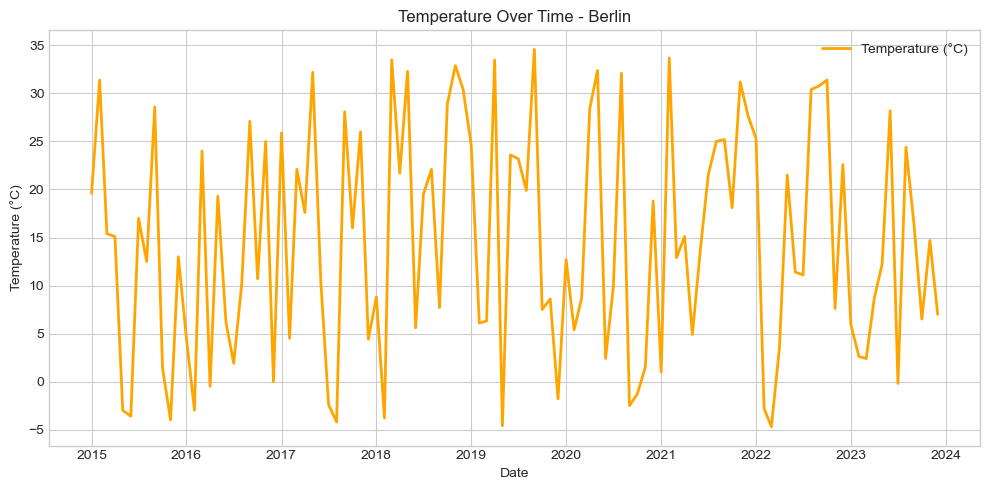

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(city_df["Date"], city_df["Temperature (°C)"], color="orange", linewidth=2, label="Temperature (°C)")
plt.title(f"Temperature Over Time - {city_name}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualizing Trends: Monthly Rainfall with Rolling Average

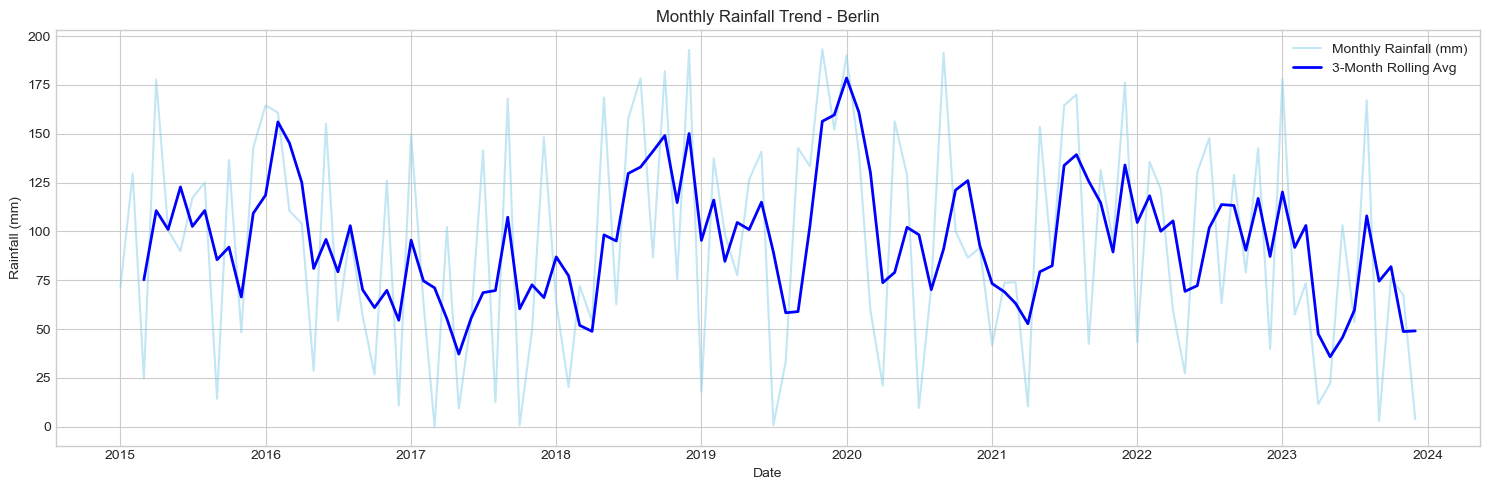

In [16]:
city_df["Rainfall_Rolling"] = city_df["Rainfall (mm)"].rolling(window=3).mean()

plt.figure(figsize=(15, 5))
plt.plot(city_df["Date"], city_df["Rainfall (mm)"], color="skyblue", alpha=0.5, label="Monthly Rainfall (mm)")
plt.plot(city_df["Date"], city_df["Rainfall_Rolling"], color="blue", linewidth=2, label="3-Month Rolling Avg")
plt.title(f"Monthly Rainfall Trend - {city_name}")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualizing Uncertainty: Temperature with Error Bars

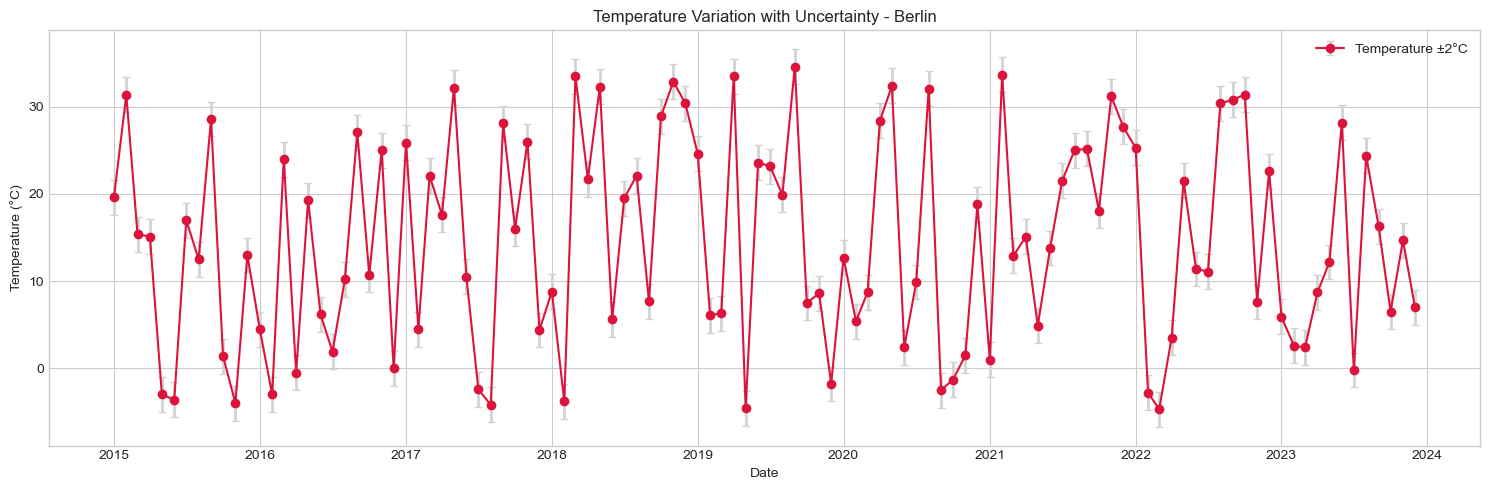

In [15]:
plt.figure(figsize=(15, 5))
plt.errorbar(
    city_df["Date"],
    city_df["Temperature (°C)"],
    yerr=2,
    fmt="-o",
    color="crimson",
    ecolor="lightgray",
    elinewidth=2,
    capsize=3,
    label="Temperature ±2°C"
)
plt.title(f"Temperature Variation with Uncertainty - {city_name}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations and Insights

In [17]:
hottest = city_df.loc[city_df["Temperature (°C)"].idxmax()]
coldest = city_df.loc[city_df["Temperature (°C)"].idxmin()]

# Average yearly rainfall
yearly_rainfall = city_df.groupby("Year")["Rainfall (mm)"].mean()

print("=== 🌡️ Observations ===")
print(f"🌞 Hottest Month: {int(hottest['Month'])}/{int(hottest['Year'])} ({hottest['Temperature (°C)']} °C)")
print(f"❄️  Coldest Month: {int(coldest['Month'])}/{int(coldest['Year'])} ({coldest['Temperature (°C)']} °C)")
print("\nAverage Rainfall per Year (mm):")
display(yearly_rainfall.round(2))

print("\n✅ Insights:")
print("- Temperature shows clear seasonal cycles (warmer mid-year, cooler early year).")
print("- Rainfall fluctuates but slightly declines after 2018.")
print("- 2018–2019 appear wetter; 2023 shows a dry pattern.")


=== 🌡️ Observations ===
🌞 Hottest Month: 9/2019 (34.6 °C)
❄️  Coldest Month: 3/2022 (-4.7 °C)

Average Rainfall per Year (mm):


Year
2015     98.18
2016     91.46
2017     75.02
2018    109.51
2019    104.54
2020    103.98
2021    101.30
2022     93.19
2023     68.07
Name: Rainfall (mm), dtype: float64


✅ Insights:
- Temperature shows clear seasonal cycles (warmer mid-year, cooler early year).
- Rainfall fluctuates but slightly declines after 2018.
- 2018–2019 appear wetter; 2023 shows a dry pattern.
